In [1]:
import numpy as np
import matplotlib.pyplot as plt
import amstrax
import strax
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
def print_entry(d, n=0, show_data=False):
    ''' Print entry number n in human-readable formate.
    Default behavior is to skip the entry 'data' since it clutters everything.
    '''
    # Check what number of spaces required for nice alignment
    max_len = np.max([len(key) for key in d.dtype.names])
    el = d[n]
    for key in d.dtype.names:
        if (show_data or key != 'data'):
            print(("{:<%d}: " % max_len).format(key), el[key])
    return

In [3]:
run_id = '180314_122555'

In [13]:
!rm -rf ./strax_data/180314_122555-event*

In [5]:
st = strax.Context(storage=strax.DataDirectory('./strax_data'),
                   #register = [amstrax.RecordsFromPax, amstrax.Records, amstrax.Peaks, amstrax.PeakBasics, 
                   #            amstrax.NCompeting
                   #           ],
                   register_all=amstrax,
                   config=dict(pax_raw_dir='/data/xenon/xams/run9/raw/data/',
                               hitfinder_threshold = 25, min_hits = 2, min_area = 1.,
                               use_channels = [0, 3],
                               nearby_window = 200e3,
                               s2_min_area = 1e4,
                               s1_max_width = 300,
                               s2_min_width = 300,
                               s1_min_n_channels = 2,
                               trigger_min_area = 1e5,
                               left_event_extension = 1e5,
                               right_event_extension = 1e5,
                               max_event_duration = 1e6
                              )
                              )

In [6]:
#     depends_on = ('events',
#                   'peak_basics', 'peak_classification',
#                   'peak_positions', 'n_competing')

In [7]:
st.show_config('peak_positions')

,option,default,current,applies_to,help
0,min_reconstruction_area,10,<OMITTED>,peak_positions,Skip reconstruction if area (PE) is less than ...
1,min_hits,1,2,peaks,Minimum number of hits to make a peak
2,min_area,0,1,peaks,Minimum area of peak
3,diagnose_sorting,False,<OMITTED>,peaks,Enable runtime checks for sorting and disjoint...
4,hitfinder_threshold,10,25,peaks,Threshold in ADC counts
5,left_extension,20,<OMITTED>,peaks,Extend peaks by this many ns left
6,right_extension,150,<OMITTED>,peaks,Extend peaks by this many ns right
7,gap_threshold,300,<OMITTED>,peaks,No hits for this much ns means new peak
8,use_channels,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 3]",peaks,Channels that correspond to TPC channels
9,software_zle_channels,[],<OMITTED>,records,Channels to apply software ZLE to


In [9]:
st.make(run_id, 'peak_positions')

Using TensorFlow backend.


In [14]:
ev = st.get_array(run_id, 'events')

In [16]:
st.make(run_id, 'event_basics')

In [17]:
eb = st.get_array(run_id, 'event_basics')

In [19]:
print_entry(eb)

n_peaks             :  2
drift_time          :  30808
s1_index            :  0
s1_area             :  8548.0
s1_area_fraction_top:  1.0
s1_range_50p_area   :  27.402094
s1_n_competing      :  2
s2_index            :  1
s2_area             :  2697189.0
s2_area_fraction_top:  1.0
s2_range_50p_area   :  450.0356
s2_n_competing      :  0
x_s2                :  0.0
y_s2                :  0.0


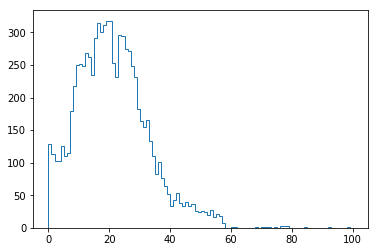

In [23]:
plt.hist(eb['drift_time'] * 1e-3, bins=100, histtype='step', range=(0, 100))
plt.show()

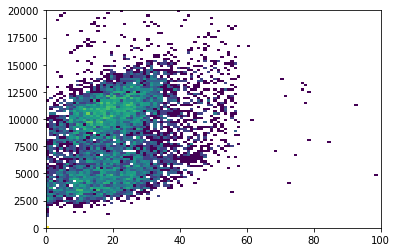

In [27]:
plt.hist2d(eb['drift_time'] * 1e-3,eb['s1_area'], bins=100, norm=LogNorm(), range=((0, 100), (0, 2e4)))
plt.show()

In [31]:
203009 / 1800

112.78277777777778

In [23]:
np.zeros(100, float)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
pt = st.get_array(run_id, 'peak_classification')

In [10]:
pt[:100]

array([(1,), (2,), (1,), (2,), (1,), (2,), (2,), (1,), (2,), (1,), (2,),
       (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (2,), (1,), (2,),
       (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (2,), (1,), (2,),
       (1,), (2,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (2,), (1,),
       (2,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,),
       (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,),
       (1,), (2,), (2,), (1,), (2,), (2,), (1,), (2,), (2,), (2,), (1,),
       (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,),
       (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,), (1,), (2,),
       (2,)], dtype=[(('Classification of the peak.', 'type'), 'i1')])

In [26]:
pb = st.get_array(run_id, 'peak_basics')

In [28]:
pb['n_channels']

array([2, 2, 2, ..., 2, 2, 2], dtype=int16)

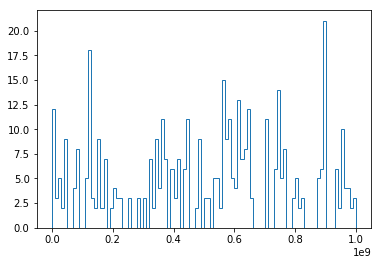

In [22]:
plt.hist(t, bins=100, histtype='step', range=(0, 1e9))
plt.show()

In [7]:
st.show_config('events')

KeyError: 'No plugin class registered that provides n_competing'

In [ ]:
st.get_array('n_competing')

In [19]:
print_entry(pb, show_data=True)

time             :  1521030355007373706
endtime          :  1521030355007373958
area             :  8548.0
n_channels       :  2
max_pmt          :  3
max_pmt_area     :  6123
range_50p_area   :  27.402094
area_fraction_top:  1.0
length           :  126
dt               :  2


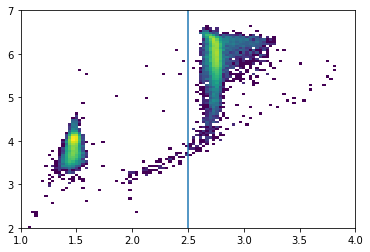

In [21]:
plt.hist2d(np.log10(pb['range_50p_area']), np.log10(pb['area']), bins=100, norm=LogNorm(), range=((1, 4), (2, 7)))
plt.axvline(2.5)
# plt.axhline(2.5)

plt.show()

In [8]:
10**2.5

316.22776601683796

In [ ]:
st.get_array

In [20]:
np.log10(p['area'])

array([4.507181 , 4.621415 , 6.4308524, ..., 4.604226 , 6.325963 ,
       3.5715923], dtype=float32)

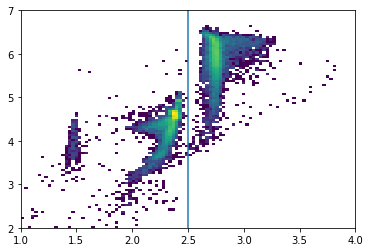

In [23]:
plt.hist2d(np.log10(p['width'][:, 5]), np.log10(p['area']), bins=100, norm=LogNorm(), range=((1, 4), (2, 7)))
plt.axvline(2.5)
# plt.axhline(2.5)

plt.show()

In [ ]:
p[]

In [20]:
print_entry(p, 7)

channel             :  -1
dt                  :  6
time                :  1521030355014274348
length              :  163
area                :  42145.0
area_per_channel    :  [ 2723     0     0  4835 34587     0     0     0     0     0     0     0
     0     0     0     0]
n_hits              :  25
width               :  [  0.      199.0243  192.19618 208.58002 230.25485 256.9677  288.4988
 333.9838  408.6782  531.1344  823.7953 ]
saturated_channel   :  [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
n_saturated_channels:  3


In [21]:
r = st.get_array(run_id, 'records')

In [22]:
r['baseline']

array([8191.725, 8269.775, 8191.   , ..., 8268.   , 8258.   , 8268.   ],
      dtype=float32)

In [28]:
len(max_in_record)

9946153

In [30]:
r['baseline']

array([8191.725, 8269.775, 8191.   , ..., 8268.   , 8258.   , 8268.   ],
      dtype=float32)